## 1. 一元线性回归模型

$$
y=f(x)=b + wx
$$

### (1). 代价函数

$$
J(w) = \frac{1}{2m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})^2}
$$

### (2) 梯度下降

#### (i) 偏导

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})x^{(i)}}\\
\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})}
$$

#### (ii) 参数更新

$$
w = w - \alpha*\frac{\partial{J}}{\partial{w}}\\
b = b - \alpha*\frac{\partial{J}}{\partial{b}}
$$

## 2. 多元线性回归模型

$$
y=f(x)=w_0 + w_1x_1 + w_2x_2 +...+w_nx_n
$$

### (1). 代价函数

$$
J(w) = \frac{1}{2m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})^2}
$$

### (2). 梯度下降

$$
\frac{\partial{J}}{\partial{w_j}} = \frac{1}{2m}\sum_{i=1}^{m}(f^{(i)}(x) - y^{(i)})x_j^{(i)} \\
w_j = w_j - \alpha * \frac{\partial{J}}{\partial{w_j}}
$$

## 3. 过程总结

* 假定此时有数据 $X_{m*n}, $  $y_{m*1}$，采用线性模型进行回归预测
* 如果数据规模过大进行归一化处理
* 超参数确定， 学习率 $\alpha$ 
* 初始化weight，确定梯度下降迭代次数，然后梯度下降法不断更新模型参数

## 4. python实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(X, theta):
    '''
    X: array (m * n)
    theta: array (n * 1)
    
    y_pred: array (m * 1)
    '''
    y_pred = X @ theta
    return y_pred

def computerCost(X, y, theta):
    '''
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    n should be the feature number plus 1
    '''
    m = len(y)
    y_pred = model(X, theta)
    J = 1/ (2*m) * ((y_pred - y).T @ (y_pred - y))
    return np.squeeze(J) 

In [3]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    alpha: learning rate between (0, 1)
    num_iters: number of iteration times
    
    n should be the feature number plus 1
    '''
    m = len(y)
    n = len(theta)
    
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        y_pred = model(X, theta)
        theta = theta - (alpha / m * (X.T @ (y_pred - y)))
        J_history[i] = computerCost(X, y, theta)
        print('.', end='')
    return theta, J_history
        
def featureNormaliza(X):
    mu = np.mean(X, axis=0, keepdims=True)
    sigma = np.std(X, axis=0, keepdims=True)
    
    X_adjust = (X - mu) / sigma
    return X_adjust

#### 一个实例

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

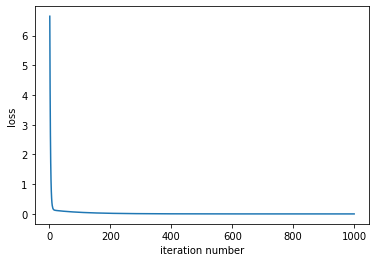

In [4]:
X = np.random.random((100, 4))
y = X @ np.array([[0.1], [0.2], [3], [2]]) + 3
#plt.scatter(X[:, 2], y)

X_adjust = np.hstack((np.ones((100, 1)), X))
theta = np.random.random((5, 1))
alpha = 0.1
num_iters = 1000

theta, J_history = gradientDescent(X_adjust, y, theta, alpha, num_iters)
plt.plot(np.arange(1,num_iters+1), J_history)
plt.xlabel('iteration number')
plt.ylabel('loss')
print('\ntheta:\n', theta)